# 1. 1. Pre-Processing Steps
 Drop Unnecessary Columns
Remove columns you don’t need to keep the dataset clean.

 Convert 'Date of transaction' to DateTime
Convert the date column using dayfirst=True so the day comes first.

 Create Year, Month, Day Columns
Extract year, month, and day from the date and create new columns.

 Drop the Original Date Column
After creating the new columns, delete the old date column.

 Check for Missing Values
Look for any missing data and fix it before modeling.

 Create a Dummy Dataset
Turn categorical columns into numbers using one-hot encoding.

 Prepare Input Datasets
Make two sets:

One with numerical inputs

One with categorical inputs (fill missing values with "Missing value").

 Train-Test Split
Split both datasets into training and testing sets for model building.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_excel(r'fraud_data.xlsx')
data.head()

,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,isFraud
0,PAYMENT,Indonesia,9839.64,C1231006815,170136.0,160296.36,M1979787155,9,0,Current,3/1/2018,Morning,0
1,PAYMENT,India,1864.28,C1666544295,21249.0,19384.72,M2044282225,10,0,Savings,5/1/2018,Morning,0
2,TRANSFER,India,181.00,C1305486145,181.0,0.00,C553264065,2,0,Current,7/1/2018,Morning,1
3,CASH_OUT,Australia,181.00,C840083671,181.0,0.00,C38997010,1,0,Current,6/1/2018,Afternoon,1
4,PAYMENT,Australia,11668.14,C2048537720,41554.0,29885.86,M1230701703,17,0,Current,6/1/2018,Morning,0


In [3]:
data.shape

(10125, 13)

In [4]:
pd.set_option('display.max_columns',None)
data.describe(include='all')

,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,isFraud
count,10125,10125,1.012500e+04,10125,1.012500e+04,1.012500e+04,10125,10125.000000,10125.0,10125,10125,10125,10125.000000
unique,5,135,NaN,10119,NaN,NaN,6494,NaN,NaN,2,14,3,NaN
top,PAYMENT,Estados Unidos,NaN,C10001825,NaN,NaN,C985934102,NaN,NaN,Savings,6/1/2018,Afternoon,NaN
freq,5544,1282,NaN,7,NaN,NaN,68,NaN,NaN,6995,1453,3628,NaN
mean,NaN,NaN,1.048873e+05,NaN,8.836949e+05,9.046314e+05,NaN,10.513580,0.0,NaN,NaN,NaN,0.011654
std,NaN,NaN,2.706366e+05,NaN,2.124555e+06,2.170130e+06,NaN,5.809393,0.0,NaN,NaN,NaN,0.107330
min,NaN,NaN,2.390000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000,0.0,NaN,NaN,NaN,0.000000
25%,NaN,NaN,4.397580e+03,NaN,1.290000e+02,0.000000e+00,NaN,6.000000,0.0,NaN,NaN,NaN,0.000000
50%,NaN,NaN,1.279882e+04,NaN,2.136300e+04,1.019179e+04,NaN,10.000000,0.0,NaN,NaN,NaN,0.000000
75%,NaN,NaN,1.143818e+05,NaN,1.724320e+05,1.707442e+05,NaN,16.000000,0.0,NaN,NaN,NaN,0.000000


In [5]:
data.columns

Index(['type', 'branch', 'amount', 'nameOrig', 'oldbalanceOrg',
       'newbalanceOrig', 'nameDest', 'unusuallogin', 'isFlaggedFraud',
       'Acct type', 'Date of transaction', 'Time of day', 'isFraud'],
      dtype='object')

In [6]:
data.isFraud.value_counts()

isFraud
0    10007
1      118
Name: count, dtype: int64

In [7]:
data.drop(['branch', 'nameOrig', 'nameDest'], axis=1, inplace=True)



In [8]:
data

,type,amount,oldbalanceOrg,newbalanceOrig,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,9,0,Current,3/1/2018,Morning,0
1,PAYMENT,1864.28,21249.0,19384.72,10,0,Savings,5/1/2018,Morning,0
2,TRANSFER,181.00,181.0,0.00,2,0,Current,7/1/2018,Morning,1
3,CASH_OUT,181.00,181.0,0.00,1,0,Current,6/1/2018,Afternoon,1
4,PAYMENT,11668.14,41554.0,29885.86,17,0,Current,6/1/2018,Morning,0
...,...,...,...,...,...,...,...,...,...,...
10120,PAYMENT,337.50,33107.0,32769.50,7,0,Current,3/1/2018,Afternoon,0
10121,PAYMENT,5003.57,32769.5,27765.93,11,0,Savings,5/1/2018,Morning,0
10122,PAYMENT,10424.89,50780.0,40355.11,6,0,Savings,7/1/2018,Night,0
10123,PAYMENT,2823.59,986.0,0.00,12,0,Savings,6/1/2018,Night,0


In [10]:
data['Date of transaction'] = pd.to_datetime(data['Date of transaction'], dayfirst=True)

In [11]:
data['transaction_year'] = data['Date of transaction'].dt.year
data['transaction_month'] = data['Date of transaction'].dt.month
data['transaction_day'] = data['Date of transaction'].dt.day

In [12]:
data

,type,amount,oldbalanceOrg,newbalanceOrig,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,isFraud,transaction_year,transaction_month,transaction_day
0,PAYMENT,9839.64,170136.0,160296.36,9,0,Current,2018-01-03,Morning,0,2018,1,3
1,PAYMENT,1864.28,21249.0,19384.72,10,0,Savings,2018-01-05,Morning,0,2018,1,5
2,TRANSFER,181.00,181.0,0.00,2,0,Current,2018-01-07,Morning,1,2018,1,7
3,CASH_OUT,181.00,181.0,0.00,1,0,Current,2018-01-06,Afternoon,1,2018,1,6
4,PAYMENT,11668.14,41554.0,29885.86,17,0,Current,2018-01-06,Morning,0,2018,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,PAYMENT,337.50,33107.0,32769.50,7,0,Current,2018-01-03,Afternoon,0,2018,1,3
10121,PAYMENT,5003.57,32769.5,27765.93,11,0,Savings,2018-01-05,Morning,0,2018,1,5
10122,PAYMENT,10424.89,50780.0,40355.11,6,0,Savings,2018-01-07,Night,0,2018,1,7
10123,PAYMENT,2823.59,986.0,0.00,12,0,Savings,2018-01-06,Night,0,2018,1,6


In [13]:
data.drop('Date of transaction',axis = 1,inplace = True)

In [14]:
data

,type,amount,oldbalanceOrg,newbalanceOrig,unusuallogin,isFlaggedFraud,Acct type,Time of day,isFraud,transaction_year,transaction_month,transaction_day
0,PAYMENT,9839.64,170136.0,160296.36,9,0,Current,Morning,0,2018,1,3
1,PAYMENT,1864.28,21249.0,19384.72,10,0,Savings,Morning,0,2018,1,5
2,TRANSFER,181.00,181.0,0.00,2,0,Current,Morning,1,2018,1,7
3,CASH_OUT,181.00,181.0,0.00,1,0,Current,Afternoon,1,2018,1,6
4,PAYMENT,11668.14,41554.0,29885.86,17,0,Current,Morning,0,2018,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
10120,PAYMENT,337.50,33107.0,32769.50,7,0,Current,Afternoon,0,2018,1,3
10121,PAYMENT,5003.57,32769.5,27765.93,11,0,Savings,Morning,0,2018,1,5
10122,PAYMENT,10424.89,50780.0,40355.11,6,0,Savings,Night,0,2018,1,7
10123,PAYMENT,2823.59,986.0,0.00,12,0,Savings,Night,0,2018,1,6


In [15]:
data.isnull().sum()

type                 0
amount               0
oldbalanceOrg        0
newbalanceOrig       0
unusuallogin         0
isFlaggedFraud       0
Acct type            0
Time of day          0
isFraud              0
transaction_year     0
transaction_month    0
transaction_day      0
dtype: int64

In [16]:
data_dummy = pd.get_dummies(data,dtype = int)


In [17]:
data_dummy

,amount,oldbalanceOrg,newbalanceOrig,unusuallogin,isFlaggedFraud,isFraud,transaction_year,transaction_month,transaction_day,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,Acct type_Current,Acct type_Savings,Time of day_Afternoon,Time of day_Morning,Time of day_Night
0,9839.64,170136.0,160296.36,9,0,0,2018,1,3,0,0,0,1,0,1,0,0,1,0
1,1864.28,21249.0,19384.72,10,0,0,2018,1,5,0,0,0,1,0,0,1,0,1,0
2,181.00,181.0,0.00,2,0,1,2018,1,7,0,0,0,0,1,1,0,0,1,0
3,181.00,181.0,0.00,1,0,1,2018,1,6,0,1,0,0,0,1,0,1,0,0
4,11668.14,41554.0,29885.86,17,0,0,2018,1,6,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,337.50,33107.0,32769.50,7,0,0,2018,1,3,0,0,0,1,0,1,0,1,0,0
10121,5003.57,32769.5,27765.93,11,0,0,2018,1,5,0,0,0,1,0,0,1,0,1,0
10122,10424.89,50780.0,40355.11,6,0,0,2018,1,7,0,0,0,1,0,0,1,0,0,1
10123,2823.59,986.0,0.00,12,0,0,2018,1,6,0,0,0,1,0,0,1,0,0,1


In [18]:
inputs = data_dummy.drop('isFraud',axis =1)
output = data_dummy['isFraud']
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.3, random_state=42)

In [22]:
inputs_cat = data.drop('isFraud', axis=1)
outputs_cat = data['isFraud']

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(inputs_cat, outputs_cat, test_size=0.3, random_state=42)

#  Model Preparation and Evaluation
 Create a List of Models
Prepare a list that includes:

XGBoost

LGBM

CatBoost

CatBoost with categorical features

Random Forest

 Train and Evaluate Models
Use the train_and_evaluate_model function to train and test all the models from your list one by one.

In [42]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [44]:
from sklearn.metrics import confusion_matrix, classification_report

def train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test):
    try:
        model.fit(X_train, y_train)

        y_pred_train = model.predict(X_train)
        y_prob_train = model.predict_proba(X_train)[:, 1]

        roc_prob_train = roc_auc_score(y_train, y_prob_train)
        gini_prob_train = roc_prob_train * 2 - 1
        confusion_matrix_result_train = confusion_matrix(y_train, y_pred_train)
        classification_report_result_train = classification_report(y_train, y_pred_train)

        print(f'Model Performance for {model_name}')
        print('Train Gini prob is', gini_prob_train * 100)
        print(classification_report_result_train)
        print(confusion_matrix_result_train)

        y_pred_test = model.predict(X_test)
        y_prob_test = model.predict_proba(X_test)[:, 1]

        roc_prob_test = roc_auc_score(y_test, y_prob_test)
        gini_prob_test = roc_prob_test * 2 - 1
        confusion_matrix_result_test = confusion_matrix(y_test, y_pred_test)
        classification_report_result_test = classification_report(y_test, y_pred_test)

        print(f'Model Performance for {model_name}')
        print('Test Gini prob is', gini_prob_test * 100)
        print(classification_report_result_test)
        print(confusion_matrix_result_test)

        return [gini_prob_train, gini_prob_test]

    except Exception as e:
        print(f"An error occurred while evaluating the model {model_name}: {e}")
        return None


In [46]:
data.head()

,type,amount,oldbalanceOrg,newbalanceOrig,unusuallogin,isFlaggedFraud,Acct type,Time of day,isFraud,transaction_year,transaction_month,transaction_day
0,PAYMENT,9839.64,170136.0,160296.36,9,0,Current,Morning,0,2018,1,3
1,PAYMENT,1864.28,21249.0,19384.72,10,0,Savings,Morning,0,2018,1,5
2,TRANSFER,181.00,181.0,0.00,2,0,Current,Morning,1,2018,1,7
3,CASH_OUT,181.00,181.0,0.00,1,0,Current,Afternoon,1,2018,1,6
4,PAYMENT,11668.14,41554.0,29885.86,17,0,Current,Morning,0,2018,1,6


In [52]:
models = []

xgb_model_def = XGBClassifier(random_state=42)
lgb_model_def = LGBMClassifier(random_state=42)
catboost_model_def = CatBoostClassifier(random_state=42)
catboost_model_custom = CatBoostClassifier(cat_features = ['type','Acct type','Time of day'],random_state=42)
random_forest_model = RandomForestClassifier(random_state = 42)

models.extend([
    ('XGBoost', xgb_model_def),
    ('LightGBM', lgb_model_def),
    ('CatBoost', catboost_model_def),
    ('CatBoost_Custom', catboost_model_custom),
    ('RandomForest',random_forest_model)
])
    

In [54]:
gini_df = pd.DataFrame(columns=['Model', 'Train Gini', 'Test Gini'])

for model_name, model in models:
    if model_name == 'CatBoost_Custom':
        gini_prob = train_and_evaluate_model(model_name, model, X_train_cat, y_train_cat, X_test_cat, y_test_cat)
    else:
        gini_prob = train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test)

    if gini_prob is not None:
        gini_df = pd.concat([gini_df, pd.DataFrame({'Model': [model_name], 'Train Gini': [gini_prob[0]], 'Test Gini': [gini_prob[1]]})], ignore_index=True)

gini_df_sorted = gini_df.sort_values(by='Test Gini', ascending=False)

gini_df_sorted

Model Performance for XGBoost
Train Gini prob is 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7008
           1       1.00      1.00      1.00        79

    accuracy                           1.00      7087
   macro avg       1.00      1.00      1.00      7087
weighted avg       1.00      1.00      1.00      7087

[[7008    0]
 [   0   79]]
Model Performance for XGBoost
Test Gini prob is 63.517753781174925
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2999
           1       0.94      0.38      0.55        39

    accuracy                           0.99      3038
   macro avg       0.96      0.69      0.77      3038
weighted avg       0.99      0.99      0.99      3038

[[2998    1]
 [  24   15]]
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 79, number of negative: 7008
[LightGBM] [Info] Auto-

C:\Users\NIcat\AppData\Local\Temp\ipykernel_6936\390598664.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gini_df = pd.concat([gini_df, pd.DataFrame({'Model': [model_name], 'Train Gini': [gini_prob[0]], 'Test Gini': [gini_prob[1]]})], ignore_index=True)


Model Performance for LightGBM
Train Gini prob is 99.99999999999997
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7008
           1       1.00      1.00      1.00        79

    accuracy                           1.00      7087
   macro avg       1.00      1.00      1.00      7087
weighted avg       1.00      1.00      1.00      7087

[[7008    0]
 [   0   79]]
Model Performance for LightGBM
Test Gini prob is 70.01393626935474
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2999
           1       1.00      0.38      0.56        39

    accuracy                           0.99      3038
   macro avg       1.00      0.69      0.78      3038
weighted avg       0.99      0.99      0.99      3038

[[2999    0]
 [  24   15]]
Learning rate set to 0.023773
0:	learn: 0.6392877	total: 4.37ms	remaining: 4.37s
1:	learn: 0.5918662	total: 8.51ms	remaining: 4.25s
2:	learn: 0.5445696	total

,Model,Train Gini,Test Gini
1,LightGBM,1.000000,0.700139
0,XGBoost,1.000000,0.635178
4,RandomForest,1.000000,0.608622
3,CatBoost_Custom,0.980373,0.580869
2,CatBoost,0.995297,0.560024


In [56]:
gini_df_sorted

,Model,Train Gini,Test Gini
1,LightGBM,1.000000,0.700139
0,XGBoost,1.000000,0.635178
4,RandomForest,1.000000,0.608622
3,CatBoost_Custom,0.980373,0.580869
2,CatBoost,0.995297,0.560024


#   Hyperparameter Optimization with Optuna
 Optimize Model Parameters
Use Optuna to find the best hyperparameters for your models.

 Evaluate Optimized Models
Call the train_and_evaluate_model function to check the results of the optimized models.

In [60]:
from sklearn.model_selection import cross_val_score
import optuna

def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'num_leaves': trial.suggest_int('num_leaves', 10, 100)
    }

    lgb_clf = LGBMClassifier(**param)

    auc = cross_val_score(lgb_clf, X_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return auc

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=1)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_lgb_model = LGBMClassifier(**best_params)

[I 2025-04-26 15:57:11,408] A new study created in memory with name: no-name-1310ab0d-50c0-4f20-b0aa-edcc09c244df
C:\Users\NIcat\AppData\Local\Temp\ipykernel_6936\3574865128.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
[I 2025-04-26 15:57:17,692] Trial 0 finished with value: 0.7574853403192444 and parameters: {'n_estimators': 334, 'learning_rate': 0.013736889362586779, 'max_depth': 7, 'num_leaves': 93}. Best is trial 0 with value: 0.7574853403192444.


Best trial:
  Value: 0.757
  Params:  {'n_estimators': 334, 'learning_rate': 0.013736889362586779, 'max_depth': 7, 'num_leaves': 93}


In [62]:
def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
         # Fraction of the training data to be randomly sampled for each boosting round (to reduce overfitting)
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        # Fraction of features (columns) to be randomly sampled for each tree (adds diversity)
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        # Controls how much gain is needed to make a split; higher = fewer splits (simpler model)
        'gamma': trial.suggest_int('gamma', 0, 10)
    }

    xgb_clf = XGBClassifier(**param)
    auc = cross_val_score(xgb_clf, X_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=10)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_xgb_model = XGBClassifier(**best_params)

[I 2025-04-26 15:57:38,782] A new study created in memory with name: no-name-d89b743e-1ecb-46c0-9f82-73a8cd2598dd
[I 2025-04-26 15:57:41,998] Trial 0 finished with value: 0.799387797746816 and parameters: {'n_estimators': 880, 'learning_rate': 0.016474681812412757, 'max_depth': 7, 'subsample': 0.5289065038258778, 'colsample_bytree': 0.6848460638889506, 'gamma': 9}. Best is trial 0 with value: 0.799387797746816.
[I 2025-04-26 15:57:42,610] Trial 1 finished with value: 0.7507917284601074 and parameters: {'n_estimators': 498, 'learning_rate': 0.06731005638909661, 'max_depth': 3, 'subsample': 0.9617491851214413, 'colsample_bytree': 0.5823076619633236, 'gamma': 0}. Best is trial 0 with value: 0.799387797746816.
[I 2025-04-26 15:57:42,931] Trial 2 finished with value: 0.781969771624452 and parameters: {'n_estimators': 309, 'learning_rate': 0.3843636913912512, 'max_depth': 3, 'subsample': 0.5392912531779841, 'colsample_bytree': 0.506692653735185, 'gamma': 3}. Best is trial 0 with value: 0.799

Best trial:
  Value: 0.802
  Params:  {'n_estimators': 746, 'learning_rate': 0.034147623891407505, 'max_depth': 3, 'subsample': 0.5676905787457731, 'colsample_bytree': 0.5439620647092541, 'gamma': 9}


In [68]:
def best_params_for_model(trial):

    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10), # Regularization term that prevents overfitting by penalizing large parameter values.
        # 'cat_features': [],  # Handle categorical features separately
        'loss_function': trial.suggest_categorical('loss_function', ['Logloss']) # For regression tasks, use ‘RMSE,’ while for classification, use ‘Logloss’.
    }

    cb_clf = CatBoostClassifier(**param)

    auc = cross_val_score(cb_clf, X_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=1)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_cb_model = CatBoostClassifier(**best_params)

[I 2025-04-26 16:00:07,352] A new study created in memory with name: no-name-f2fe521f-b459-4cee-9099-b9d5f42b7827
C:\Users\NIcat\AppData\Local\Temp\ipykernel_6936\1299305732.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\NIcat\AppData\Local\Temp\ipykernel_6936\1299305732.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10), # Regularization term that prevents overfitting by penalizing large parameter values.
[I 2025-04-26 16:00:08,769] Trial 0 finished with value: 0.7901929744110109 and parameters: {'iterations': 115, 'learn

Best trial:
  Value: 0.790
  Params:  {'iterations': 115, 'learning_rate': 0.043511407745009674, 'depth': 5, 'l2_leaf_reg': 3.281837677895819, 'loss_function': 'Logloss'}


In [72]:
def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
    }

    rf_clf = RandomForestClassifier(**param)

    auc = cross_val_score(rf_clf, X_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return auc

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=1)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_rf_model = RandomForestClassifier(**best_params)

[I 2025-04-26 16:02:51,909] A new study created in memory with name: no-name-050264cf-03d3-4fa6-9d83-8ecd42ebe23c
[I 2025-04-26 16:03:02,660] Trial 0 finished with value: 0.7663801402385877 and parameters: {'n_estimators': 671, 'max_depth': 8, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 0 with value: 0.7663801402385877.


Best trial:
  Value: 0.766
  Params:  {'n_estimators': 671, 'max_depth': 8, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': None}


In [78]:
models_optimized = []

models_optimized.extend([
    ('XGBoost Optuna', best_xgb_model),
    ('LightGBM Optuna', best_lgb_model),
    ('CatBoost Optuna', best_cb_model),
    ('RF Optuna',best_rf_model)
])

In [80]:
gini_df_optuna = pd.DataFrame(columns=['Model', 'Train Gini', 'Test Gini'])

for model_name, model in models_optimized:
    gini_prob = train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test)
    if gini_prob is not None:
        gini_df_optuna = pd.concat([gini_df_optuna, pd.DataFrame({'Model': [model_name], 'Train Gini': [gini_prob[0]], 'Test Gini': [gini_prob[1]]})], ignore_index=True)

gini_df_sorted_optuna = gini_df_optuna.sort_values(by='Test Gini', ascending=False)

gini_df_sorted_optuna


C:\Users\NIcat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NIcat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NIcat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NIcat\anaconda3\Lib\site-packag

Model Performance for XGBoost Optuna
Train Gini prob is 70.00588838795446
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7008
           1       0.00      0.00      0.00        79

    accuracy                           0.99      7087
   macro avg       0.49      0.50      0.50      7087
weighted avg       0.98      0.99      0.98      7087

[[7008    0]
 [  79    0]]
Model Performance for XGBoost Optuna
Test Gini prob is 59.135951300006
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2999
           1       0.00      0.00      0.00        39

    accuracy                           0.99      3038
   macro avg       0.49      0.50      0.50      3038
weighted avg       0.97      0.99      0.98      3038

[[2999    0]
 [  39    0]]
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 79, number of negative: 7008


C:\Users\NIcat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NIcat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NIcat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model Performance for RF Optuna
Train Gini prob is 99.0882029940466
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7008
           1       1.00      0.29      0.45        79

    accuracy                           0.99      7087
   macro avg       1.00      0.65      0.72      7087
weighted avg       0.99      0.99      0.99      7087

[[7008    0]
 [  56   23]]
Model Performance for RF Optuna
Test Gini prob is 60.7304999102265
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2999
           1       1.00      0.10      0.19        39

    accuracy                           0.99      3038
   macro avg       0.99      0.55      0.59      3038
weighted avg       0.99      0.99      0.98      3038

[[2999    0]
 [  35    4]]


,Model,Train Gini,Test Gini
1,LightGBM Optuna,0.999845,0.677995
3,RF Optuna,0.990882,0.607305
0,XGBoost Optuna,0.700059,0.591360
2,CatBoost Optuna,0.667263,0.574901


#  All Results of Models
 Combine Default and Optimized Models
Concat the results of default and optimized models' Gini scores.

 Decide the Best Model
Choose the model with the best Gini score.

In [84]:
final_review = pd.concat([gini_df_sorted,gini_df_sorted_optuna], axis=0)

final_review_sorted = final_review.sort_values(by='Test Gini', ascending=False)
final_review_sorted.reset_index(drop=True, inplace=True)

final_review_sorted

,Model,Train Gini,Test Gini
0,LightGBM,1.000000,0.700139
1,LightGBM Optuna,0.999845,0.677995
2,XGBoost,1.000000,0.635178
3,RandomForest,1.000000,0.608622
4,RF Optuna,0.990882,0.607305
5,XGBoost Optuna,0.700059,0.591360
6,CatBoost_Custom,0.980373,0.580869
7,CatBoost Optuna,0.667263,0.574901
8,CatBoost,0.995297,0.560024


#  SHAP Value Analysis & Feature Importance
 Check SHAP and Feature Importance
For the best model, analyze SHAP values and feature importance.

 Select Important Variables
Choose variables with Importance > 1%.

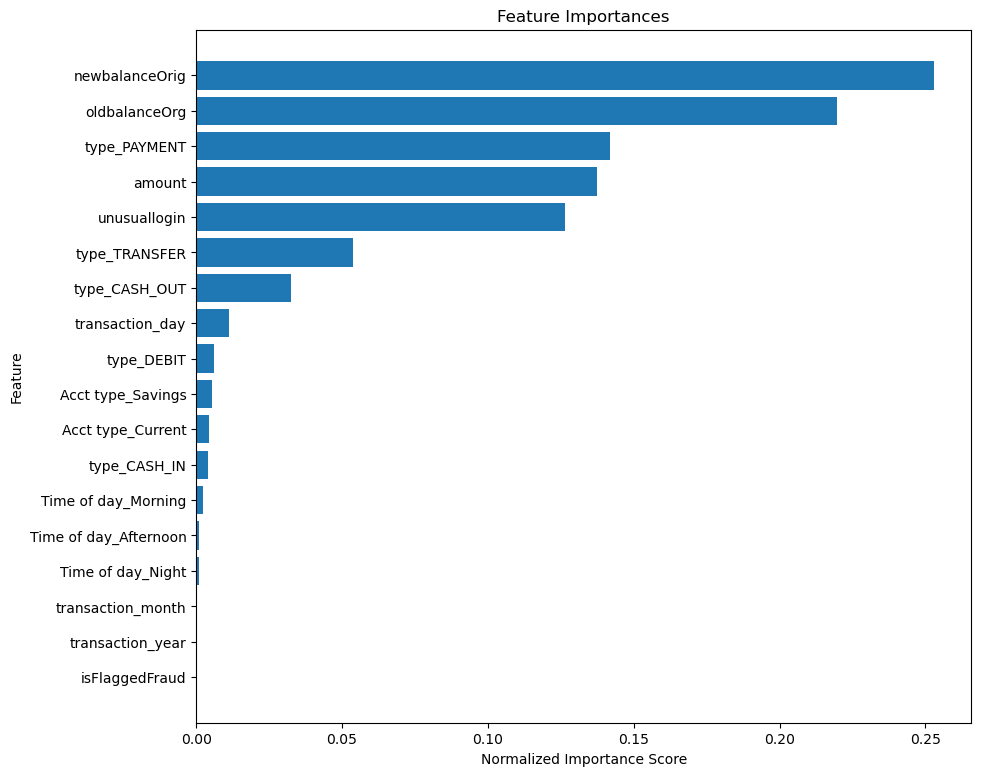

In [86]:
import matplotlib.pyplot as plt

importances = best_cb_model.feature_importances_


importances = importances / importances.sum()

importance_df = pd.DataFrame({
        'Feature':  X_train.columns,
        'Importance': importances
    }).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 9))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title("Feature Importances")
plt.xlabel("Normalized Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()

In [88]:
importance_df

,Feature,Importance
2,newbalanceOrig,0.253009
1,oldbalanceOrg,0.219634
11,type_PAYMENT,0.141824
0,amount,0.137351
3,unusuallogin,0.126294
12,type_TRANSFER,0.053884
9,type_CASH_OUT,0.032610
7,transaction_day,0.011158
10,type_DEBIT,0.006000
14,Acct type_Savings,0.005286


In [90]:
important_features_df = importance_df[importance_df['Importance'] > 0.01]

print("Features with Importance > 1%:")
important_features_df

Features with Importance > 1%:


,Feature,Importance
2,newbalanceOrig,0.253009
1,oldbalanceOrg,0.219634
11,type_PAYMENT,0.141824
0,amount,0.137351
3,unusuallogin,0.126294
12,type_TRANSFER,0.053884
9,type_CASH_OUT,0.032610
7,transaction_day,0.011158


In [92]:
important_features_df.Feature.tolist()

['newbalanceOrig',
 'oldbalanceOrg',
 'type_PAYMENT',
 'amount',
 'unusuallogin',
 'type_TRANSFER',
 'type_CASH_OUT',
 'transaction_day']

SHAP Values Summary (Selected Features)


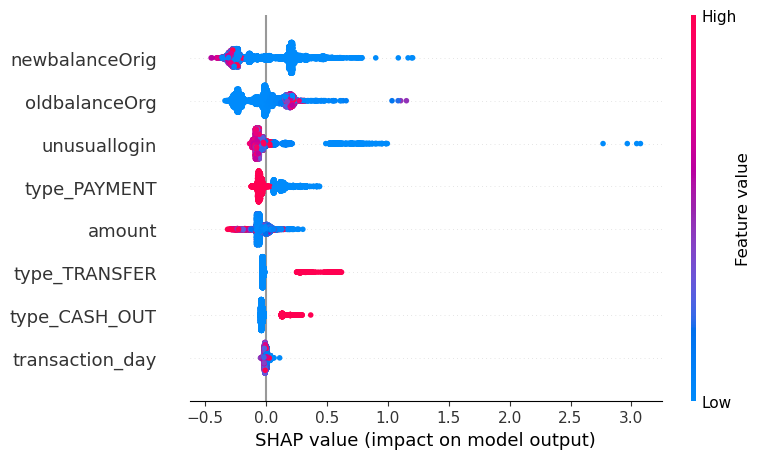

In [96]:
import shap

selected_features = [
    'newbalanceOrig',
 'oldbalanceOrg',
 'type_PAYMENT',
 'amount',
 'unusuallogin',
 'type_TRANSFER',
 'type_CASH_OUT',
 'transaction_day'
]


explainer = shap.TreeExplainer(best_cb_model)
shap_values = explainer.shap_values(X_train)


shap_df = pd.DataFrame(shap_values, columns=X_train.columns)
shap_selected = shap_df[selected_features]
X_selected = X_train[selected_features]


print("SHAP Values Summary (Selected Features)")
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_selected.values, X_selected, show=False)
plt.tight_layout()
plt.show()

#  Build Best Model Using Final Inputs
 Train the Best Model
Train the best selected model on the final inputs.

 Check Results
If the result is higher than 40%, move the model into the production environment.



In [98]:
new_inputs = important_features_df['Feature'].tolist()

new_inputs

['newbalanceOrig',
 'oldbalanceOrg',
 'type_PAYMENT',
 'amount',
 'unusuallogin',
 'type_TRANSFER',
 'type_CASH_OUT',
 'transaction_day']

In [104]:
fin_input = data_dummy[important_features_df['Feature'].tolist()]
fin_output =data['isFraud']

X_train_fin, X_test_fin, y_train_fin, y_test_fin = train_test_split(fin_input, fin_output, test_size=0.3, random_state=42)

model_fin = best_cb_model.fit(X_train_fin,y_train_fin)

0:	learn: 0.6532243	total: 2.06ms	remaining: 235ms
1:	learn: 0.6173730	total: 3.83ms	remaining: 217ms
2:	learn: 0.5838358	total: 5.68ms	remaining: 212ms
3:	learn: 0.5529168	total: 8.16ms	remaining: 226ms
4:	learn: 0.5241350	total: 10.3ms	remaining: 226ms
5:	learn: 0.4973535	total: 12.8ms	remaining: 232ms
6:	learn: 0.4721987	total: 14.8ms	remaining: 228ms
7:	learn: 0.4493753	total: 16.7ms	remaining: 223ms
8:	learn: 0.4274536	total: 18.4ms	remaining: 217ms
9:	learn: 0.4068388	total: 20.6ms	remaining: 216ms
10:	learn: 0.3880181	total: 23.2ms	remaining: 220ms
11:	learn: 0.3701403	total: 25.7ms	remaining: 221ms
12:	learn: 0.3531769	total: 27.5ms	remaining: 216ms
13:	learn: 0.3375329	total: 29.3ms	remaining: 212ms
14:	learn: 0.3226169	total: 31.1ms	remaining: 207ms
15:	learn: 0.3085645	total: 32.8ms	remaining: 203ms
16:	learn: 0.2954698	total: 34.5ms	remaining: 199ms
17:	learn: 0.2831827	total: 36.3ms	remaining: 195ms
18:	learn: 0.2715583	total: 38.4ms	remaining: 194ms
19:	learn: 0.2604131	t

In [106]:
train_and_evaluate_model('CB opitimized for selected features', best_cb_model, X_train_fin, y_train_fin, X_test_fin, y_test_fin)

0:	learn: 0.6532243	total: 2.2ms	remaining: 251ms
1:	learn: 0.6173730	total: 4.44ms	remaining: 251ms
2:	learn: 0.5838358	total: 6.41ms	remaining: 239ms
3:	learn: 0.5529168	total: 8.56ms	remaining: 238ms
4:	learn: 0.5241350	total: 10.6ms	remaining: 233ms
5:	learn: 0.4973535	total: 12.5ms	remaining: 228ms
6:	learn: 0.4721987	total: 15.1ms	remaining: 233ms
7:	learn: 0.4493753	total: 17.2ms	remaining: 230ms
8:	learn: 0.4274536	total: 19.2ms	remaining: 226ms
9:	learn: 0.4068388	total: 21.2ms	remaining: 223ms
10:	learn: 0.3880181	total: 23.5ms	remaining: 222ms
11:	learn: 0.3701403	total: 25.4ms	remaining: 218ms
12:	learn: 0.3531769	total: 27.8ms	remaining: 218ms
13:	learn: 0.3375329	total: 29.9ms	remaining: 215ms
14:	learn: 0.3226169	total: 32.2ms	remaining: 215ms
15:	learn: 0.3085645	total: 34.4ms	remaining: 213ms
16:	learn: 0.2954698	total: 36.8ms	remaining: 212ms
17:	learn: 0.2831827	total: 38.9ms	remaining: 210ms
18:	learn: 0.2715583	total: 41ms	remaining: 207ms
19:	learn: 0.2604131	tota

C:\Users\NIcat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NIcat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NIcat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[0.6834016097335414, 0.5936936243705166]

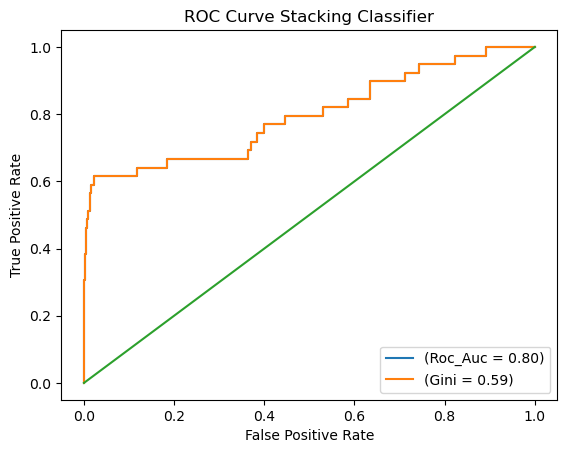

In [108]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob_fin = model_fin.predict_proba(X_test_fin)[:,1]

roc_auc = roc_auc_score(y_test_fin, y_prob_fin)
gini = (2*roc_auc_score(y_test_fin, y_prob_fin))-1

fpr, tpr, thresholds = roc_curve(y_test_fin, y_prob_fin)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Stacking Classifier')

plt.legend(loc='lower right')
plt.show()

#  Deployment
 Deploy Model
Deploy the model on the fraud_deploy_data.xlsx.

 Create 'Probability of Fraud' Column
Generate a new column with the probability of fraud.

 Extract Fraudulent Data
Filter and extract rows where probability of fraud > 10%.

In [220]:
test = pd.read_excel(r'fraud_deploy_data.xlsx')
test

,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,id
0,CASH_OUT,Irak,386683.04,C1373577787,0.00,0.00,C33524623,12,0,Savings,7/1/2018,Morning,1
1,PAYMENT,Estados Unidos,504.83,C49365994,608907.09,608402.27,M1529649769,8,0,Savings,13/1/2018,Afternoon,2
2,PAYMENT,Costa de Marfil,9805.46,C480184864,0.00,0.00,M1433956626,19,0,Savings,7/1/2018,Morning,3
3,CASH_OUT,Mexico,54395.20,C391915263,587.49,0.00,C1531333864,9,0,Current,6/1/2018,Afternoon,4
4,PAYMENT,Argelia,24258.10,C247576438,394.00,0.00,M775635860,7,0,Savings,11/1/2018,Night,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,CASH_IN,Mexico,235409.03,C1538844412,10500000.00,10700000.00,C1538745405,13,0,Savings,19/1/2018,Night,1008
1008,CASH_IN,Mexico,29351.64,C853343978,10000000.00,10100000.00,C187649742,20,0,Savings,6/1/2018,Afternoon,1009
1009,CASH_OUT,Turquia,363482.02,C1457226878,25365.85,0.00,C1899073220,7,0,Savings,13/1/2018,Afternoon,1010
1010,CASH_OUT,Alemania,31980.86,C1558129795,0.00,0.00,C257999182,13,0,Savings,7/1/2018,Morning,1011


In [222]:
test.columns

Index(['type', 'branch', 'amount', 'nameOrig', 'oldbalanceOrg',
       'newbalanceOrig', 'nameDest', 'unusuallogin', 'isFlaggedFraud',
       'Acct type', 'Date of transaction', 'Time of day', 'id'],
      dtype='object')

In [224]:
fin_input.columns

Index(['newbalanceOrig', 'oldbalanceOrg', 'type_PAYMENT', 'amount',
       'unusuallogin', 'type_TRANSFER', 'type_CASH_OUT', 'transaction_day'],
      dtype='object')

In [226]:
test['Date of transaction'] = pd.to_datetime(test['Date of transaction'], dayfirst=True)


test['transaction_year'] = test['Date of transaction'].dt.year
test['transaction_month'] = test['Date of transaction'].dt.month
test['transaction_day'] = test['Date of transaction'].dt.day

In [228]:
test = pd.get_dummies(test,dtype=int)

In [230]:
test

amount  oldbalanceOrg  newbalanceOrig  unusuallogin  isFlaggedFraud  \
0     386683.04           0.00            0.00            12               0   
1        504.83      608907.09       608402.27             8               0   
2       9805.46           0.00            0.00            19               0   
3      54395.20         587.49            0.00             9               0   
4      24258.10         394.00            0.00             7               0   
...         ...            ...             ...           ...             ...   
1007  235409.03    10500000.00     10700000.00            13               0   
1008   29351.64    10000000.00     10100000.00            20               0   
1009  363482.02       25365.85            0.00             7               0   
1010   31980.86           0.00            0.00            13               0   
1011   13194.66           0.00            0.00             4               0   

     Date of transaction    id  transaction_year  transaction_month  \
0             2018-01-07     1            2018.0                1.0   
1             2018-01-13     2            2018.0                1.0   
2             2018-01-07     3            2018.0                1.0   
3             2018-01-06     4            2018.0                1.0   
4             2018-01-11     5            2018.0                1.0   
...                  ...   ...               ...                ...   
1007          2018-01-19  1008            2018.0                1.0   
1008          2018-01-06  1009            2018.0                1.0   
1009          2018-01-13  1010            2018.0                1.0   
1010          2018-01-07  1011            2018.0                1.0   
1011          2018-01-08  1012            2018.0                1.0   

      transaction_day  type_CASH_IN  type_CASH_OUT  type_DEBIT  type_PAYMENT  \
0                 7.0             0              1           0             0   
1                13.0             0              0           0             1   
2                 7.0             0              0           0             1   
3                 6.0             0              1           0             0   
4                11.0             0              0           0             1   
...               ...           ...            ...         ...           ...   
1007             19.0             1              0           0             0   
1008              6.0             1              0           0             0   
1009             13.0             0              1           0             0   
1010              7.0             0              1           0             0   
1011              8.0             0              0           0             1   

      type_TRANSFER  branch_Alemania  branch_Angola  branch_Arabia Saudi  \
0                 0                0              0                    0   
1                 0                0              0                    0   
2                 0                0              0                    0   
3                 0                0              0                    0   
4                 0                0              0                    0   
...             ...              ...            ...                  ...   
1007              0                0              0                    0   
1008              0                0              0                    0   
1009              0                0              0                    0   
1010              0                1              0                    0   
1011              0                0              0                    0   

      branch_Argelia  branch_Argentina  branch_Australia  branch_Austria  \
0                  0                 0                 0               0   
1                  0                 0                 0               0   
2                  0                 0                 0               0   
3                

In [231]:
test = test[['id',
'newbalanceOrig',
 'oldbalanceOrg',
 'type_PAYMENT',
 'amount',
 'unusuallogin',
 'type_TRANSFER',
 'type_CASH_OUT',
 'transaction_day']]

In [234]:
test

,id,newbalanceOrig,oldbalanceOrg,type_PAYMENT,amount,unusuallogin,type_TRANSFER,type_CASH_OUT,transaction_day
0,1,0.00,0.00,0,386683.04,12,0,1,7.0
1,2,608402.27,608907.09,1,504.83,8,0,0,13.0
2,3,0.00,0.00,1,9805.46,19,0,0,7.0
3,4,0.00,587.49,0,54395.20,9,0,1,6.0
4,5,0.00,394.00,1,24258.10,7,0,0,11.0
...,...,...,...,...,...,...,...,...,...
1007,1008,10700000.00,10500000.00,0,235409.03,13,0,0,19.0
1008,1009,10100000.00,10000000.00,0,29351.64,20,0,0,6.0
1009,1010,0.00,25365.85,0,363482.02,7,0,1,13.0
1010,1011,0.00,0.00,0,31980.86,13,0,1,7.0


In [236]:
test.columns

Index(['id', 'newbalanceOrig', 'oldbalanceOrg', 'type_PAYMENT', 'amount',
       'unusuallogin', 'type_TRANSFER', 'type_CASH_OUT', 'transaction_day'],
      dtype='object')

In [238]:
test['probability'] = model_fin.predict_proba(test.iloc[:,1:])[:,1]

test

C:\Users\NIcat\AppData\Local\Temp\ipykernel_6936\953758592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['probability'] = model_fin.predict_proba(test.iloc[:,1:])[:,1]


,id,newbalanceOrig,oldbalanceOrg,type_PAYMENT,amount,unusuallogin,type_TRANSFER,type_CASH_OUT,transaction_day,probability
0,1,0.00,0.00,0,386683.04,12,0,1,7.0,0.014527
1,2,608402.27,608907.09,1,504.83,8,0,0,13.0,0.010266
2,3,0.00,0.00,1,9805.46,19,0,0,7.0,0.010940
3,4,0.00,587.49,0,54395.20,9,0,1,6.0,0.020408
4,5,0.00,394.00,1,24258.10,7,0,0,11.0,0.010525
...,...,...,...,...,...,...,...,...,...,...
1007,1008,10700000.00,10500000.00,0,235409.03,13,0,0,19.0,0.012757
1008,1009,10100000.00,10000000.00,0,29351.64,20,0,0,6.0,0.013334
1009,1010,0.00,25365.85,0,363482.02,7,0,1,13.0,0.026746
1010,1011,0.00,0.00,0,31980.86,13,0,1,7.0,0.020560


In [240]:
test = test[test['probability'] >= 0.10]


In [242]:
test

,id,newbalanceOrig,oldbalanceOrg,type_PAYMENT,amount,unusuallogin,type_TRANSFER,type_CASH_OUT,transaction_day,probability
401,402,0.0,120074.73,0,120074.73,1,1,0,25.0,0.104230
435,436,0.0,120074.73,0,120074.73,1,0,1,3.0,0.122835
912,913,0.0,50762.00,0,93296.50,1,1,0,8.0,0.101573
